In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('questions.csv', on_bad_lines='skip', engine="python")
df.shape

(404347, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404347 entries, 0 to 404346
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            404347 non-null  int64  
 1   qid1          404347 non-null  object 
 2   qid2          404347 non-null  object 
 3   question1     404346 non-null  object 
 4   question2     404343 non-null  object 
 5   is_duplicate  404343 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,4
is_duplicate,4


In [7]:
df.duplicated().sum()


0

is_duplicate
0.0    255037
1.0    149306
Name: count, dtype: int64
is_duplicate
0.0    63.074419
1.0    36.925581
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

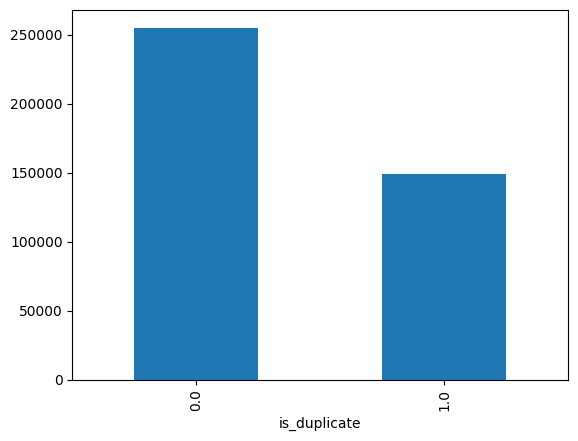

In [8]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique Questions", np.unique(qid).shape[0])
x = qid.value_counts() > 1
print("Number of questions getting repeated", x[x].shape[0])

Number of unique Questions 789793
Number of questions getting repeated 13698


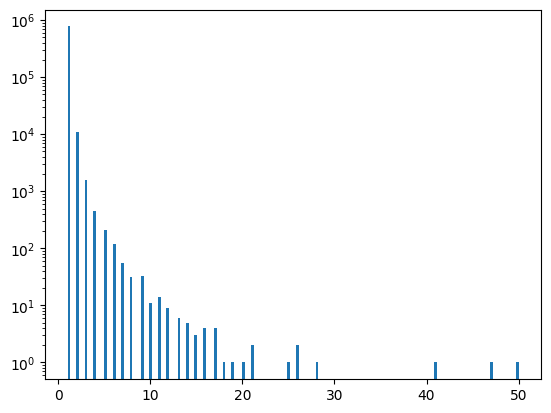

In [10]:
#Repeated Questions Histogram
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')

# Only BOW

In [11]:
new_df = df.sample(30000,random_state=2)

In [16]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [17]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
302974,How can I stop listening to the same piece ove...,What can be said about people who listen to th...
226905,What are reviews for Food Grade Diatomaceous E...,Is the use of food grade diatomaceous earth safe?
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Which one should I learn first - C or C++?,"Among C, C++ and C# which one should I learn? ..."
299910,Do guys like it when girls are persistent?,Do guys like it when girls are virgins?


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [34]:
questions

['How can I stop listening to the same piece over and over?',
 'What are reviews for Food Grade Diatomaceous Earth?',
 'How would an arbitrageur seek to capitalize given the following conditions: S0 + Pa (S0,T,X) < Ca (S0,T,X) + X (l + r) ^(-T)?',
 'Which one should I learn first - C or C++?',
 'Do guys like it when girls are persistent?',
 'What are some things new employees should know going into their first day at Resource America?',
 'If space (the universe) is a sphere or saddle shape, then what is outside of that? What do you call the empty space outside that comes after?',
 'What is the best way to become a great programmer?',
 'What is the best place I should visit in the winter in India?',
 'Can you own more than 10% of a bank and be CEO of the bank?',
 'Why is salt water taffy candy unknown in Japan?',
 'Which is the easiest optional subject for IAS mains?',
 'Which are the safest cities in India?',
 'What are the signs of a controlling boyfriend?',
 'Is there life after deat

In [19]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [28]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [29]:
print(temp_df.iloc[:,0:-1].values)
print(temp_df.iloc[:,-1].values)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 1. 0. ... 0. 0. 1.]


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7385

In [33]:
from xgboost import XGBClassifier # Changed XGBFClassifier to XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7191666666666666

# BOW with basic feature

In [12]:
new_df = df.sample(30000,random_state=2)

In [13]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [14]:

new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
302974,302978,594975,594976,How can I stop listening to the same piece ove...,What can be said about people who listen to th...,0.0,57,95,12,20
226905,226909,447198,447199,What are reviews for Food Grade Diatomaceous E...,Is the use of food grade diatomaceous earth safe?,1.0,51,49,8,9
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0.0,125,124,24,24
54203,75506,150039,150040,Which one should I learn first - C or C++?,"Among C, C++ and C# which one should I learn? ...",0.0,42,72,10,16
299910,299914,589053,589054,Do guys like it when girls are persistent?,Do guys like it when girls are virgins?,0.0,42,39,8,8


In [15]:
new_df['q1_len']

,q1_len
302974,57
226905,51
4665,125
54203,42
299910,42
...,...
82661,136
125062,55
43027,115
155178,134


In [16]:
new_df['q2_len']

,q2_len
302974,95
226905,49
4665,124
54203,72
299910,39
...,...
82661,43
125062,56
43027,114
155178,132


In [17]:
new_df['question1'][43027]

'If the concept of evil is not associated with a religion then, beyond a particularly egregious problem, what is it?'

In [18]:
def word_common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [19]:
set(map(lambda word: word.lower().strip(),'If the concept of evil is not associated with a religion then, beyond a particularly egregious problem, what is it?'.split(" ")))

{'a',
 'associated',
 'beyond',
 'concept',
 'egregious',
 'evil',
 'if',
 'is',
 'it?',
 'not',
 'of',
 'particularly',
 'problem,',
 'religion',
 'the',
 'then,',
 'what',
 'with'}

In [20]:
new_df['word_common'] = new_df.apply(word_common, axis=1)

In [21]:
new_df.sample(6)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
337212,337216,661111,661112,How is the Cost of Living in Vadodara (Baroda),What are the living costs in Noida?,0.0,46,35,9,7,3
107518,107522,213241,213242,Is there any web design like Zomato?,What is the Zomato business model?,0.0,36,34,7,6,1
55280,76583,152167,152168,What strikes first time visitors as special or...,What strikes first time visitors as special or...,0.0,89,94,15,15,14
173177,173181,342166,342167,Why do men cheats on their wives?,Why men cheat?,1.0,33,14,7,3,2
223772,223776,441054,441055,Do children get toys to play with in communist...,Toys: Why are all children's merchandise predo...,0.0,55,69,10,9,0
202986,202990,400520,400521,How do I know that my boyfriend loves me?,How do I know if my girlfriend still loves me?,1.0,41,46,9,10,7


In [22]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [23]:
new_df['total_words'] = new_df.apply(total_words, axis=1)

In [24]:
new_df.sample(6)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
271778,271782,534505,534506,What is the average salary of an SAP MM module?,What is the average salary for SAP PP module?,0.0,47,45,10,9,7,19
391765,391769,765733,765734,What is the future of the robotics?,Where is the future of robotics headed?,1.0,35,39,7,7,4,13
126988,126992,251587,251588,Can we say that coup in Turkey succeeded but t...,What will happen to Erdogan if the coup in Tur...,0.0,92,59,18,11,4,28
213522,213526,421082,421083,What is Magnus Carlsen's IQ?,What makes Magnus Carlsen so good at chess?,0.0,28,43,5,8,2,13
121956,121960,241683,241684,"What is the meaning of Doppler effect, with re...",What are some mind-blowing facts about The Big...,0.0,85,71,16,12,5,27
291756,291760,573220,573221,What IKEA products or product lines differ aro...,How many products does Ikea sell per year?,0.0,60,42,10,8,2,18


In [25]:
new_df['word_share'] = round(new_df['word_common']/new_df['total_words'],2)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
302974,302978,594975,594976,How can I stop listening to the same piece ove...,What can be said about people who listen to th...,0.0,57,95,12,20,5,32,0.16
226905,226909,447198,447199,What are reviews for Food Grade Diatomaceous E...,Is the use of food grade diatomaceous earth safe?,1.0,51,49,8,9,3,17,0.18
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0.0,125,124,24,24,20,42,0.48
54203,75506,150039,150040,Which one should I learn first - C or C++?,"Among C, C++ and C# which one should I learn? ...",0.0,42,72,10,16,4,24,0.17
299910,299914,589053,589054,Do guys like it when girls are persistent?,Do guys like it when girls are virgins?,0.0,42,39,8,8,7,16,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82661,89744,178189,178190,theories (anything worisome) about a painful p...,How do I use a neural network in a website?,0.0,136,43,22,10,2,31,0.06
125062,125066,247794,247795,Who would win in a fight between Superman and ...,Who would win in a fight between Superman and ...,0.0,55,56,11,11,10,22,0.45
43027,21976,43845,43846,If the concept of evil is not associated with ...,If the concept of evil is not associated with ...,0.0,115,114,20,20,15,36,0.42
155178,155182,306904,306905,What is the smallest four-digit number which w...,What is the largest three-digit number that wh...,0.0,134,132,26,26,14,36,0.39


minimum char: 1
maximum char: 335
average char: 59.3023


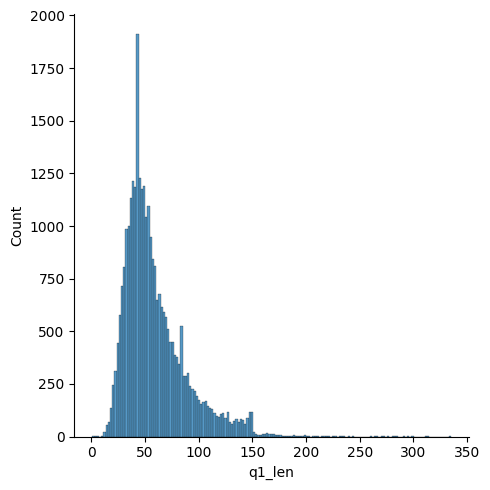

In [26]:
sns.displot(new_df['q1_len'])
print("minimum char:", new_df['q1_len'].min())
print("maximum char:", new_df['q1_len'].max())
print("average char:", new_df['q1_len'].mean())

minimum char: 6
maximum char: 1169
average char: 59.84493333333333


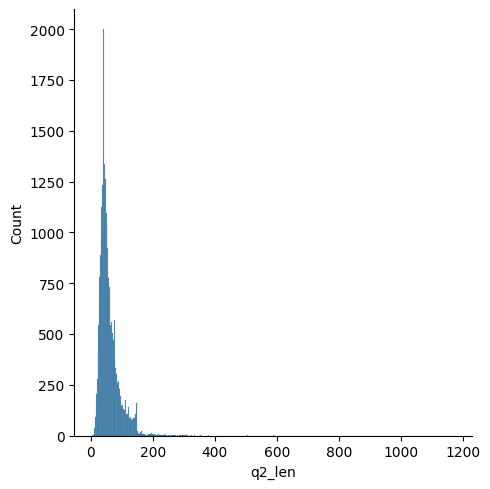

In [27]:
sns.displot(new_df['q2_len'])
print("minimum char:", new_df['q2_len'].min())
print("maximum char:", new_df['q2_len'].max())
print("average char:", new_df['q2_len'].mean())

minimum char: 1
maximum char: 73
average char: 10.920766666666667


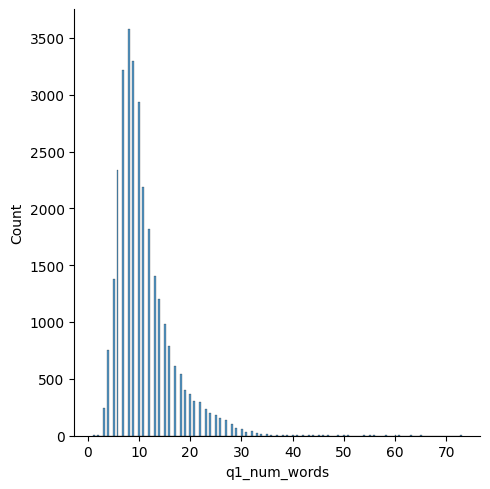

In [28]:
sns.displot(new_df['q1_num_words'])
print("minimum char:", new_df['q1_num_words'].min())
print("maximum char:", new_df['q1_num_words'].max())
print("average char:", new_df['q1_num_words'].mean())

minimum char: 1
maximum char: 237
average char: 11.151666666666667


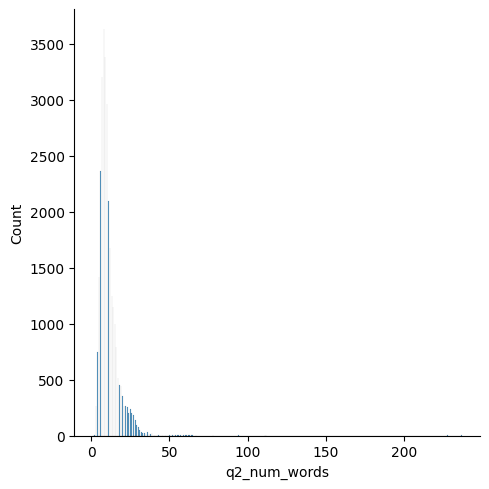

In [29]:
sns.displot(new_df['q2_num_words'])
print("minimum char:", new_df['q2_num_words'].min())
print("maximum char:", new_df['q2_num_words'].max())
print("average char:", new_df['q2_num_words'].mean())

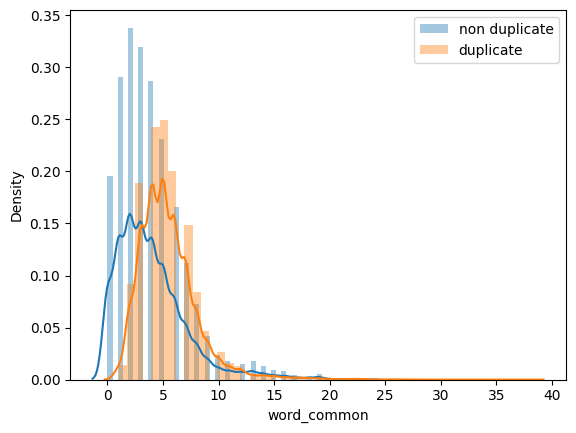

In [30]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

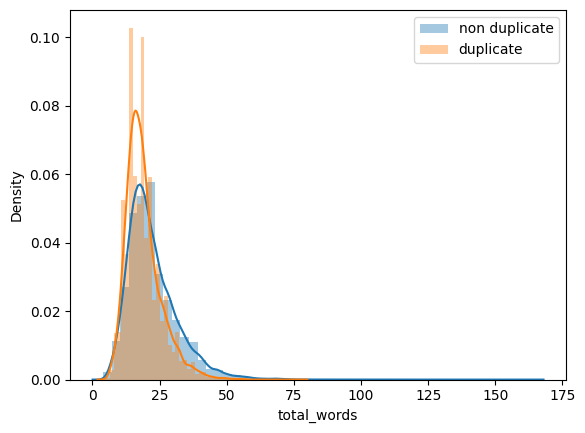

In [31]:

# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words'],label='duplicate')
plt.legend()
plt.show()

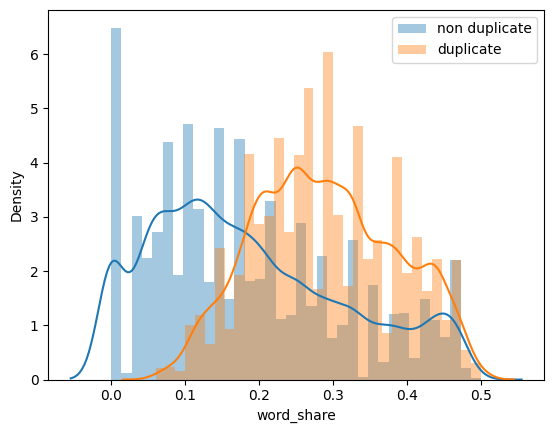

In [32]:

# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [33]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
302974,How can I stop listening to the same piece ove...,What can be said about people who listen to th...
226905,What are reviews for Food Grade Diatomaceous E...,Is the use of food grade diatomaceous earth safe?
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Which one should I learn first - C or C++?,"Among C, C++ and C# which one should I learn? ..."
299910,Do guys like it when girls are persistent?,Do guys like it when girls are virgins?


In [34]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
302974,0.0,57,95,12,20,5,32,0.16
226905,1.0,51,49,8,9,3,17,0.18
4665,0.0,125,124,24,24,20,42,0.48
54203,0.0,42,72,10,16,4,24,0.17
299910,0.0,42,39,8,8,7,16,0.44


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [36]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [37]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
302974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()


(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
302974,0.0,57,95,12,20,5,32,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0
226905,1.0,51,49,8,9,3,17,0.18,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0.0,125,124,24,24,20,42,0.48,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0.0,42,72,10,16,4,24,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
299910,0.0,42,39,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7696666666666667

# bow-with-preprocessing-and-advanced-feature

In [61]:
new_df = df


In [62]:
!pip install beautifulsoup4 # Install the correct package

import re
from bs4 import BeautifulSoup # Import BeautifulSoup from the bs4 module


In [63]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [64]:
preprocess("I've already! wasn't <b>done</b>?")


'i have already  was not done'

In [65]:

new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [66]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate
302974,302978,594975,594976,how can i stop listening to the same piece ove...,what can be said about people who listen to th...,0.0
226905,226909,447198,447199,what are reviews for food grade diatomaceous e...,is the use of food grade diatomaceous earth safe,1.0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0.0
54203,75506,150039,150040,which one should i learn first c or c,among c c and c which one should i learn i kno...,0.0
299910,299914,589053,589054,do guys like it when girls are persistent,do guys like it when girls are virgins,0.0


In [67]:

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [68]:

new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
302974,302978,594975,594976,how can i stop listening to the same piece ove...,what can be said about people who listen to th...,0.0,56,94,12,20
226905,226909,447198,447199,what are reviews for food grade diatomaceous e...,is the use of food grade diatomaceous earth safe,1.0,50,48,8,9
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0.0,105,104,24,24
54203,75506,150039,150040,which one should i learn first c or c,among c c and c which one should i learn i kno...,0.0,37,64,9,16
299910,299914,589053,589054,do guys like it when girls are persistent,do guys like it when girls are virgins,0.0,41,38,8,8


In [69]:

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [70]:

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
302974,302978,594975,594976,how can i stop listening to the same piece ove...,what can be said about people who listen to th...,0.0,56,94,12,20,5
226905,226909,447198,447199,what are reviews for food grade diatomaceous e...,is the use of food grade diatomaceous earth safe,1.0,50,48,8,9,4
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0.0,105,104,24,24,17
54203,75506,150039,150040,which one should i learn first c or c,among c c and c which one should i learn i kno...,0.0,37,64,9,16,6
299910,299914,589053,589054,do guys like it when girls are persistent,do guys like it when girls are virgins,0.0,41,38,8,8,7


In [71]:

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [72]:

new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
302974,302978,594975,594976,how can i stop listening to the same piece ove...,what can be said about people who listen to th...,0.0,56,94,12,20,5,31
226905,226909,447198,447199,what are reviews for food grade diatomaceous e...,is the use of food grade diatomaceous earth safe,1.0,50,48,8,9,4,17
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0.0,105,104,24,24,17,36
54203,75506,150039,150040,which one should i learn first c or c,among c c and c which one should i learn i kno...,0.0,37,64,9,16,6,19
299910,299914,589053,589054,do guys like it when girls are persistent,do guys like it when girls are virgins,0.0,41,38,8,8,7,16


In [73]:

new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
302974,302978,594975,594976,how can i stop listening to the same piece ove...,what can be said about people who listen to th...,0.0,56,94,12,20,5,31,0.16
226905,226909,447198,447199,what are reviews for food grade diatomaceous e...,is the use of food grade diatomaceous earth safe,1.0,50,48,8,9,4,17,0.24
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0.0,105,104,24,24,17,36,0.47
54203,75506,150039,150040,which one should i learn first c or c,among c c and c which one should i learn i kno...,0.0,37,64,9,16,6,19,0.32
299910,299914,589053,589054,do guys like it when girls are persistent,do guys like it when girls are virgins,0.0,41,38,8,8,7,16,0.44


In [76]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [77]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [78]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [79]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
302974,302978,594975,594976,how can i stop listening to the same piece ove...,what can be said about people who listen to th...,0.0,56,94,12,20,...,31,0.16,0.000000,0.000000,0.624992,0.454541,0.416663,0.249999,0.0,0.0
226905,226909,447198,447199,what are reviews for food grade diatomaceous e...,is the use of food grade diatomaceous earth safe,1.0,50,48,8,9,...,17,0.24,0.799984,0.666656,0.000000,0.000000,0.499994,0.444440,0.0,0.0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0.0,105,104,24,24,...,36,0.47,0.923070,0.923070,0.999980,0.999980,0.708330,0.708330,1.0,1.0
54203,75506,150039,150040,which one should i learn first c or c,among c c and c which one should i learn i kno...,0.0,37,64,9,16,...,19,0.32,0.749981,0.428565,0.749981,0.749981,0.666659,0.374998,1.0,0.0
299910,299914,589053,589054,do guys like it when girls are persistent,do guys like it when girls are virgins,0.0,41,38,8,8,...,16,0.44,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0


In [84]:
!pip install python-Levenshtein # Install the Levenshtein library

In [91]:
!pip install python-Levenshtein # Install the Levenshtein library
import Levenshtein as distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    length_features = [0.0] * 3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Calculate the length of the longest common substring using ratio
    # The Levenshtein library doesn't have lcsubstrings, but it has ratio which serves a similar purpose
    length_features[2] = distance.ratio(q1, q2)
    #length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1) #Removed lcsubstring

    return length_features

In [92]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [93]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
302974,302978,594975,594976,how can i stop listening to the same piece ove...,what can be said about people who listen to th...,0.0,56,94,12,20,...,0.000000,0.624992,0.454541,0.416663,0.249999,0.0,0.0,8.0,16.0,0.546667
226905,226909,447198,447199,what are reviews for food grade diatomaceous e...,is the use of food grade diatomaceous earth safe,1.0,50,48,8,9,...,0.666656,0.000000,0.000000,0.499994,0.444440,0.0,0.0,1.0,8.5,0.734694
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0.0,105,104,24,24,...,0.923070,0.999980,0.999980,0.708330,0.708330,1.0,1.0,0.0,24.0,0.995215
54203,75506,150039,150040,which one should i learn first c or c,among c c and c which one should i learn i kno...,0.0,37,64,9,16,...,0.428565,0.749981,0.749981,0.666659,0.374998,1.0,0.0,7.0,12.5,0.613861
299910,299914,589053,589054,do guys like it when girls are persistent,do guys like it when girls are virgins,0.0,41,38,8,8,...,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0,0.0,8.0,0.860759


In [96]:
!pip install fuzzywuzzy # Install fuzzywuzzy

In [98]:

# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [99]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [97]:
print(new_df.shape)
new_df.head()

(30000, 24)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
302974,302978,594975,594976,how can i stop listening to the same piece ove...,what can be said about people who listen to th...,0.0,56,94,12,20,...,0.000000,0.624992,0.454541,0.416663,0.249999,0.0,0.0,8.0,16.0,0.546667
226905,226909,447198,447199,what are reviews for food grade diatomaceous e...,is the use of food grade diatomaceous earth safe,1.0,50,48,8,9,...,0.666656,0.000000,0.000000,0.499994,0.444440,0.0,0.0,1.0,8.5,0.734694
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0.0,105,104,24,24,...,0.923070,0.999980,0.999980,0.708330,0.708330,1.0,1.0,0.0,24.0,0.995215
54203,75506,150039,150040,which one should i learn first c or c,among c c and c which one should i learn i kno...,0.0,37,64,9,16,...,0.428565,0.749981,0.749981,0.666659,0.374998,1.0,0.0,7.0,12.5,0.613861
299910,299914,589053,589054,do guys like it when girls are persistent,do guys like it when girls are virgins,0.0,41,38,8,8,...,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,1.0,0.0,8.0,0.860759


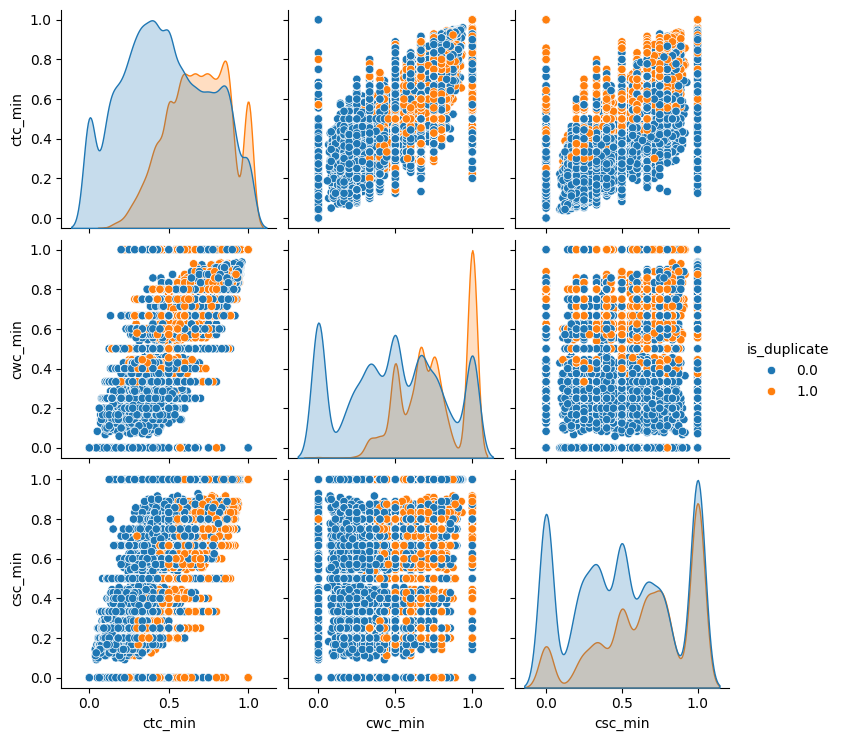

In [100]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')


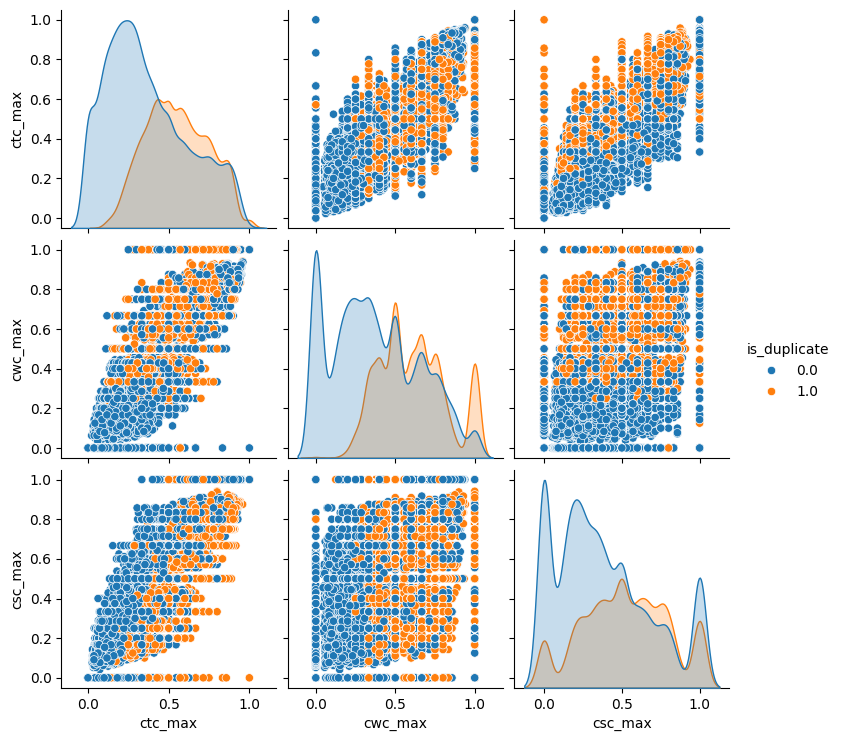

In [101]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


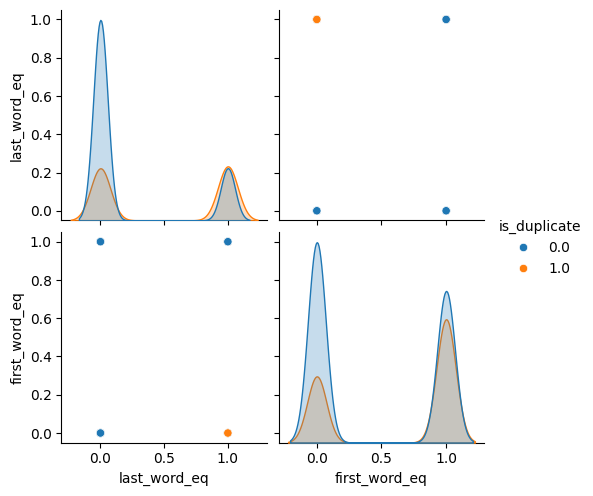

In [102]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


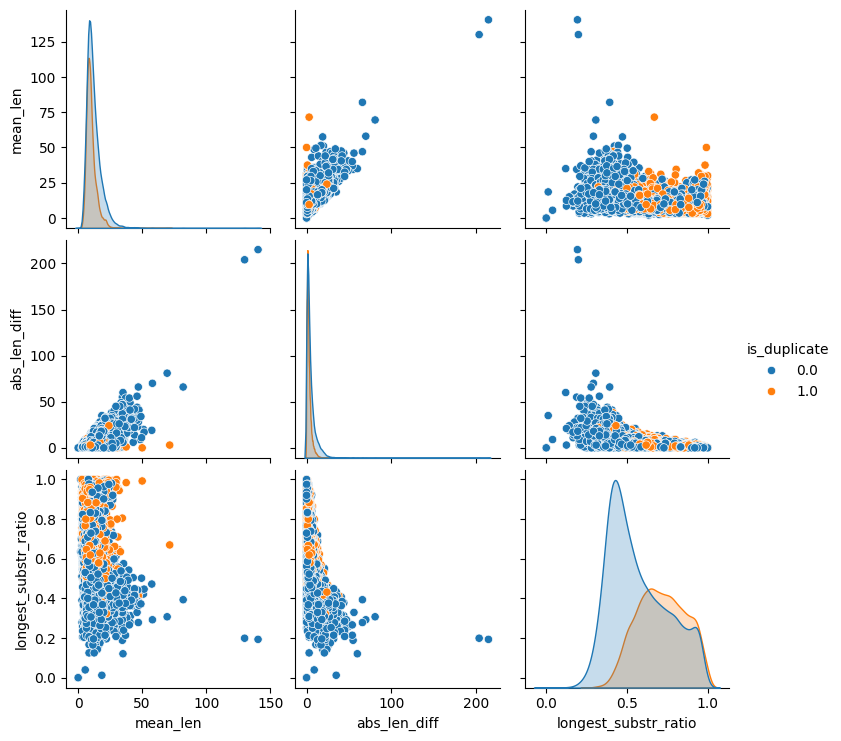

In [103]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')


In [104]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [105]:

from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.074s...
[t-SNE] Computed neighbors for 30000 samples in 11.487s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

In [107]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

TypeError: lmplot() got an unexpected keyword argument 'size'

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
from sklearn.manifold import TSNE

py.init_notebook_mode(connected=True)

# Define tsne3d with n_components=3 for 3D visualization
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.425s...
[t-SNE] Computed neighbors for 30000 samples in 15.674s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

In [ ]:

ques_df = new_df[['question1','question2']]
ques_df.head()

In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:

temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

In [ ]:

final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:

# for random forest model
confusion_matrix(y_test,y_pred)

In [ ]:

# for xgboost model
confusion_matrix(y_test,y_pred1)

In [ ]:

import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))